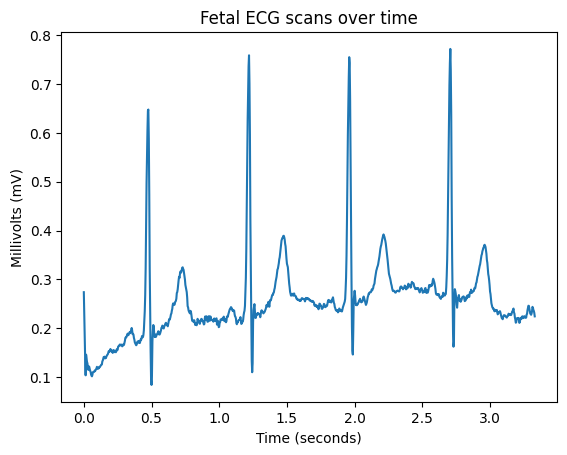

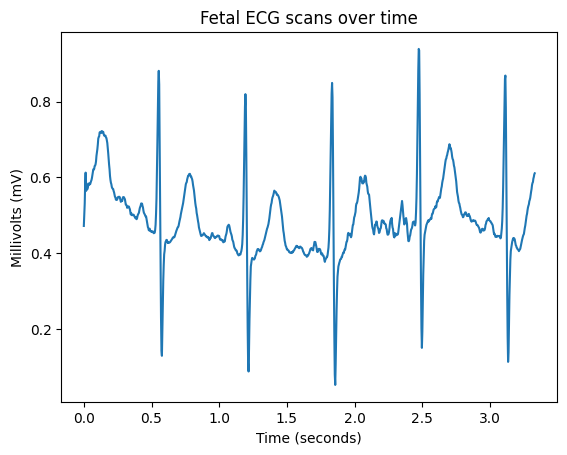

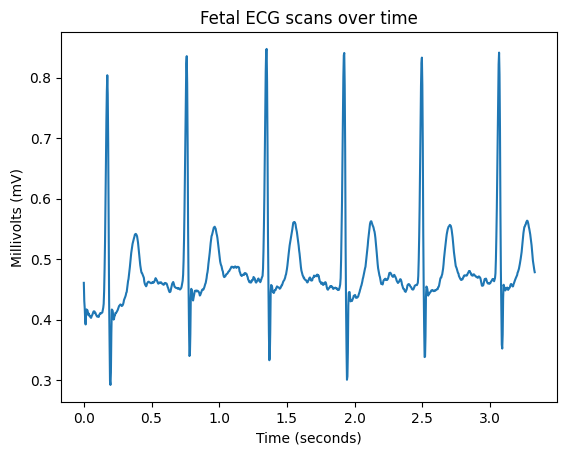

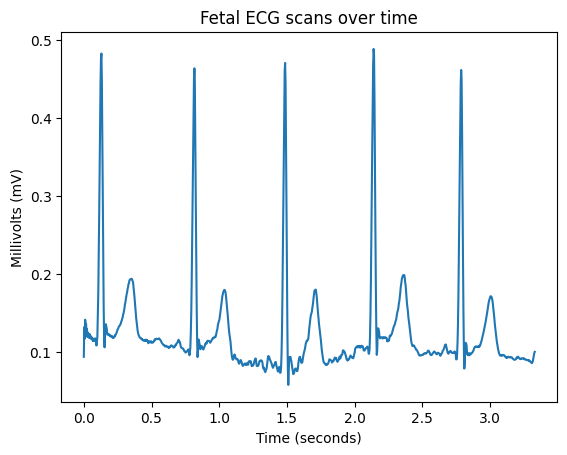

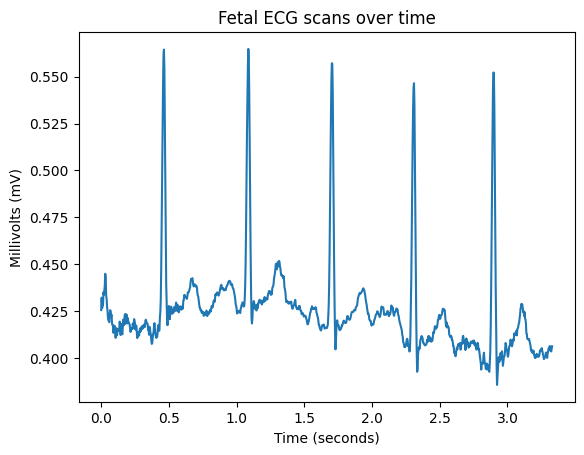

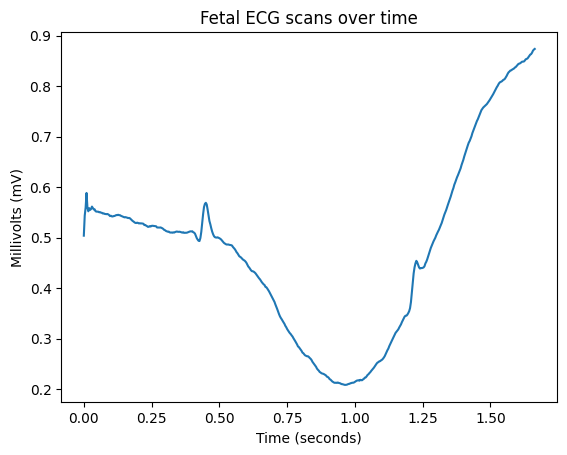

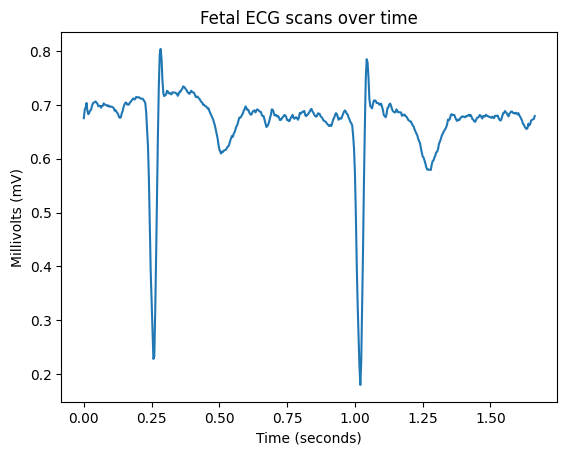

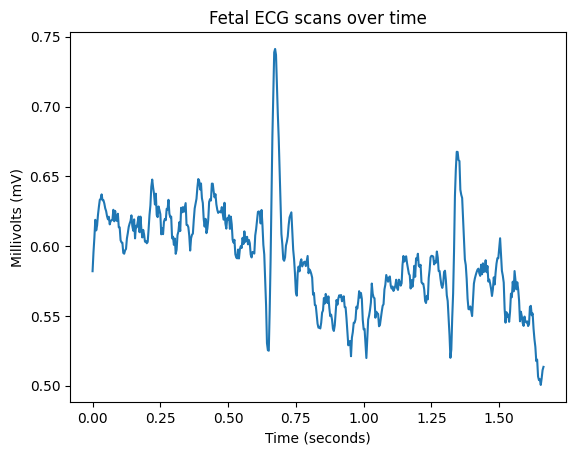

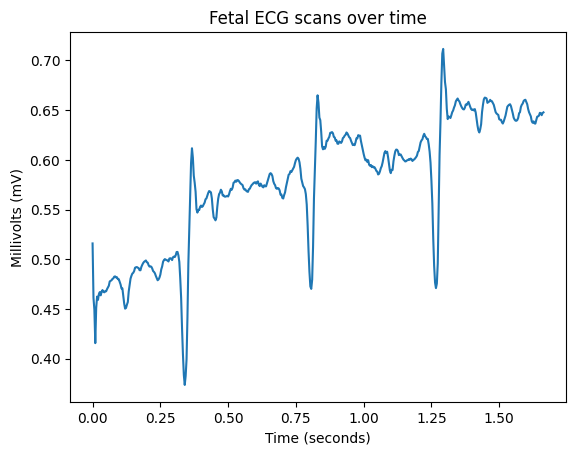

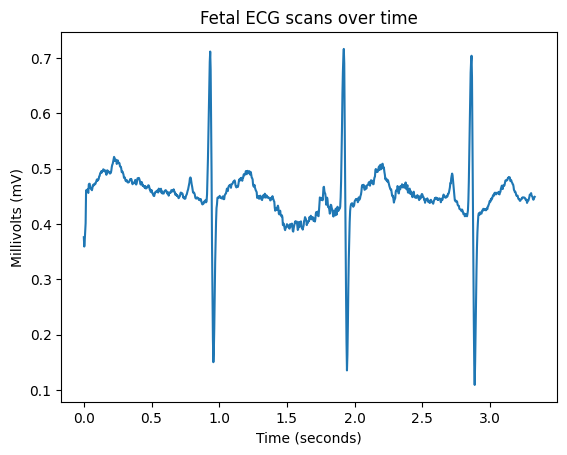

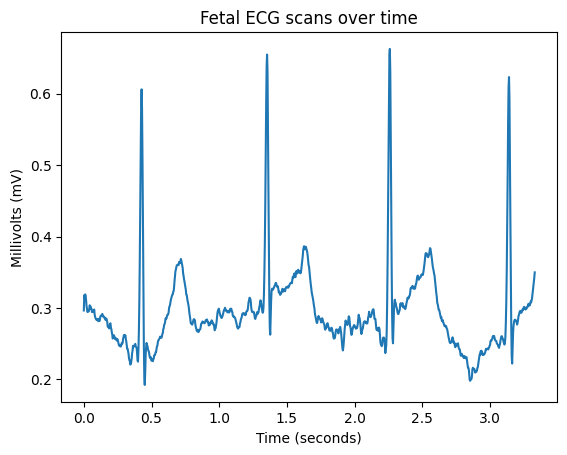

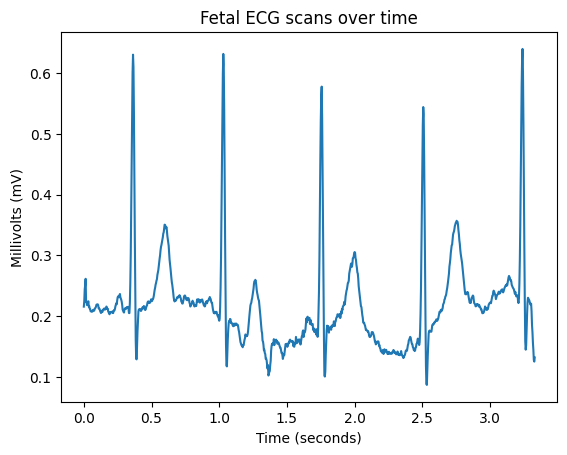

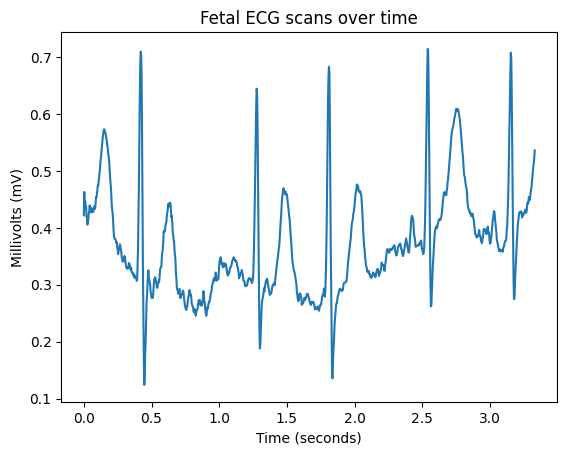

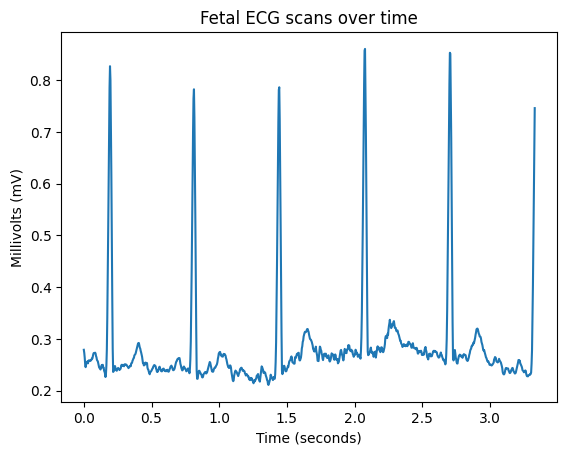

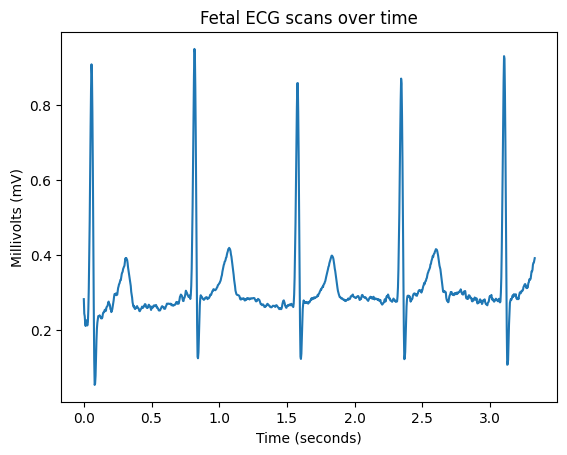

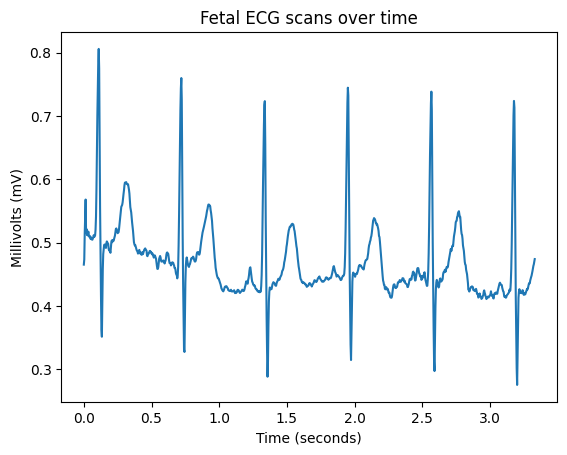

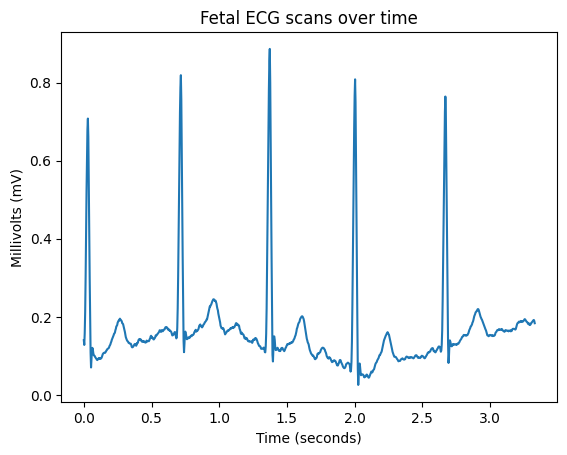

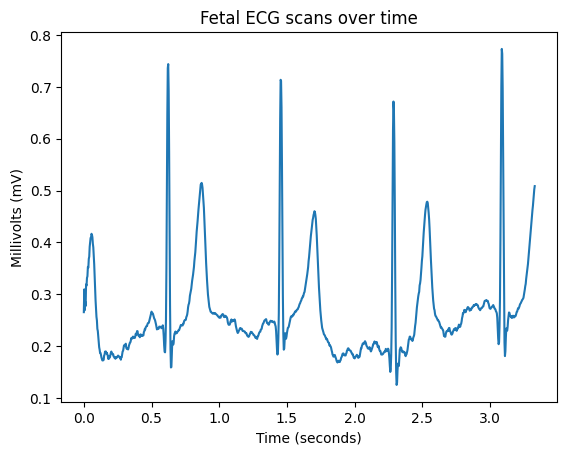

KeyboardInterrupt: 

<Figure size 640x480 with 0 Axes>

In [22]:
import matplotlib.pyplot as plt
import wfdb
import numpy as np
import scipy.signal
from scipy.signal import find_peaks 
from scipy import signal
import neurokit2 as nk

# def neuro_kit(signal,sampling_rate):
#     nk.ecg_process(signal,sampling_rate, method='neurokit')
#     nk.ecg_plot(signal)


def resample(data,fs):
    
    current_frequency = fs
    nyquist_frequency = 300
    
    frequency_ratio = nyquist_frequency/current_frequency
    total_resampled_samples = int(len(data)*(frequency_ratio))

    sampled_data = signal.resample(data, total_resampled_samples)
    
    return sampled_data


def normalize(data):

    minimum = np.min(data)
    maximum = np.max(data)
    data  = (data - minimum)/(maximum-minimum)
    return data

def plot_data(normalized_data):
   
    plt.title("Fetal ECG scans over time")
    plt.xlabel("Time (seconds)")
    plt.ylabel("Millivolts (mV)")
    x = np.arange(0,len(normalized_data))/300
    plt.plot(x[0:fs],normalized_data[0:fs,0])
    plt.show()
    plt.figure()

records_file_path = 'non-invasive-fetal-ecg-arrhythmia-database-1.0.0/RECORDS'
with open(records_file_path, 'r') as f:
    record_names = f.read().splitlines()


for record_name in record_names:
    record_path = 'non-invasive-fetal-ecg-arrhythmia-database-1.0.0/' + record_name
    record = wfdb.rdrecord(record_path)
    signals = record.p_signal
    fs = record.fs

    sampled_data = resample(signals,fs)
    normalized_data = normalize(sampled_data)
    plot_data(normalized_data)

    
    
    
    
    



    